In [89]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [177]:
dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0  represents not 
dta['affairs'] = (dta.affairs >0).astype(int)
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [179]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [180]:
X.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Intercept      6366 non-null   float64
 1   occ_2          6366 non-null   float64
 2   occ_3          6366 non-null   float64
 3   occ_4          6366 non-null   float64
 4   occ_5          6366 non-null   float64
 5   occ_6          6366 non-null   float64
 6   occ_husb_2     6366 non-null   float64
 7   occ_husb_3     6366 non-null   float64
 8   occ_husb_4     6366 non-null   float64
 9   occ_husb_5     6366 non-null   float64
 10  occ_husb_6     6366 non-null   float64
 11  rate_marriage  6366 non-null   float64
 12  age            6366 non-null   float64
 13  yrs_married    6366 non-null   float64
 14  children       6366 non-null   float64
 15  religious      6366 non-null   float64
 16  educ           6366 non-null   float64
dtypes: float64(17)
memory usage: 895.2 KB


In [182]:
X.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

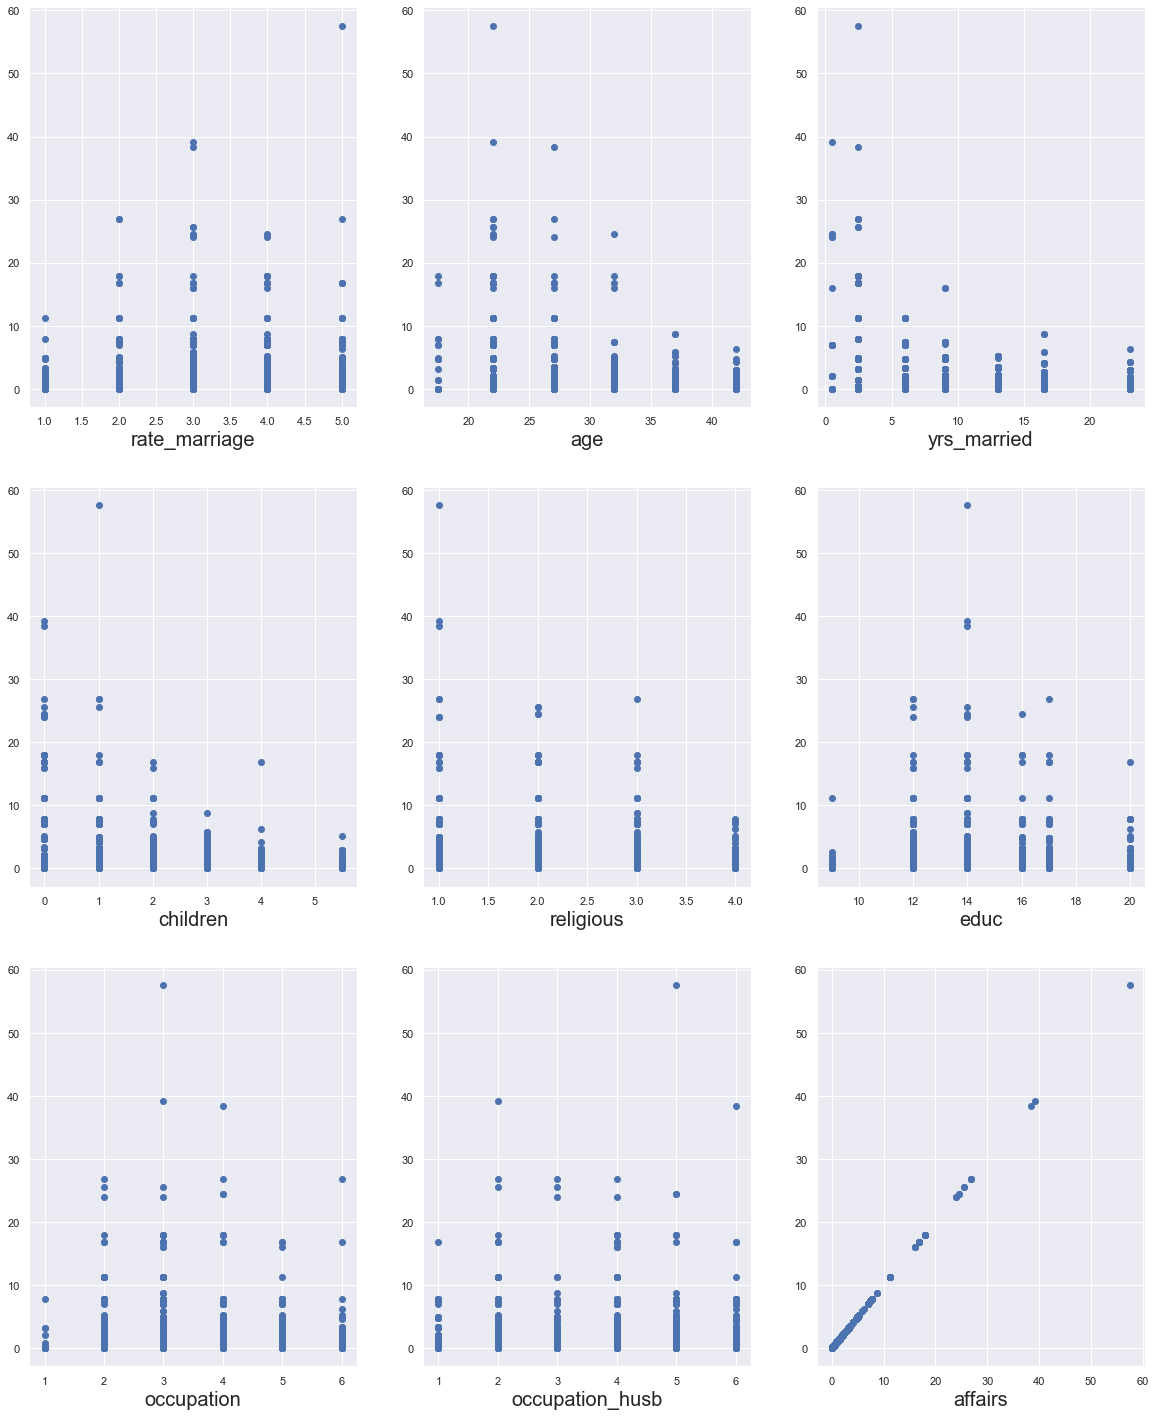

In [176]:
dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0


plt.figure(figsize=(20,25))
plotnumber=1

for column in dta:
    if plotnumber<11:
        ax = plt.subplot(3,3, plotnumber)
        plt.scatter(dta[column],dta['affairs'])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
    

plt.show()

In [191]:
#Directly We will build logistic regression model and will check the accuracy
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.3, random_state = 15)
log_reg1 = LogisticRegression()

log_reg1.fit(x_train,y_train)
y_pred = log_reg1.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.731413612565445
[[1169  140]
 [ 373  228]]
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      1309
         1.0       0.62      0.38      0.47       601

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.71      0.73      0.71      1910



C:\Users\Jagdish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [192]:
#Now we will build model after scalling data and then will check accuracy
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.3, random_state = 15)
log_reg2 = LogisticRegression()

log_reg2.fit(x_train,y_train)
y_pred = log_reg2.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.731413612565445
[[1170  139]
 [ 374  227]]
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      1309
         1.0       0.62      0.38      0.47       601

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [196]:
#We will build model by using Cross validation and will check accuracy for model log_reg1

accuracy = cross_val_score(log_reg1, X_scaled, y, cv=10,scoring='accuracy')
accuracy, accuracy.mean()

(array([0.71899529, 0.70172684, 0.73783359, 0.70643642, 0.70486656,
        0.7299843 , 0.72955975, 0.70597484, 0.75471698, 0.74685535]),
 0.7236949932367722)

In [197]:
#We will build model by using Cross validation and will check accuracy log_reg2

accuracy = cross_val_score(log_reg2, X_scaled, y, cv=10,scoring='accuracy')
accuracy, accuracy.mean()

(array([0.71899529, 0.70172684, 0.73783359, 0.70643642, 0.70486656,
        0.7299843 , 0.72955975, 0.70597484, 0.75471698, 0.74685535]),
 0.7236949932367722)

In [211]:
log_reg2.predict_proba(np.array([[1,0,1,0,0,0,0,0,1,0,0,2,25,12,2,1,14]]))

array([[0.95930378, 0.04069622]])

In [214]:
log_reg1.predict_proba(np.array([[1,0,0,1,0,0,1,0,0,0,0,1,16,6,1,1,16]]))

array([[0.10087364, 0.89912636]])

log_reg1 model working fine so  probability of affair is 24%

In [216]:
log_reg1.predict_proba(np.array([[1,0,0,0,0,1,0,0,0,0,1,3,32,9,3,3,17]]))

array([[0.63196516, 0.36803484]])

log_reg1 model working fine so  probability of affair is 63% as per data model is working good